In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm import tqdm
from tqdm import trange

In [2]:
def total_cord(cord_dircpath):
    cord_file_lst = glob.glob(cord_dircpath+"*.csv")

    cord_dictlst = {"x":[], "y":[]}
    for path in tqdm(cord_file_lst):
        cord_arr = np.loadtxt(path, delimiter=",", dtype=int)
        cord_arr = cord_arr[~((cord_arr[:, 0] < 400) * (cord_arr[:, 1] < 100))]
        cord_dictlst["x"].extend(cord_arr[:,0])
        cord_dictlst["y"].extend(cord_arr[:, 1])
        
    assert len(cord_dictlst["x"]) == len(cord_dictlst["y"]) 

    return cord_dictlst

In [3]:
cord_dictlst = total_cord("../data/20170421/10/")
cord_df = pd.DataFrame(cord_dictlst)
cord_df.head()

100%|██████████| 3597/3597 [00:02<00:00, 1447.95it/s]


,x,y
0,548,155
1,515,103
2,439,119
3,311,167
4,765,145


In [4]:
WIDTH = 1280
grid_num = 5
grid_width = int(WIDTH/grid_num)
print("img: {}, grid number: {}, grid width: {}".format(WIDTH, grid_num, grid_width))

img: 1280, grid number: 5, grid width: 256


In [5]:
cord_df["grid_x"] = (cord_df["x"]/grid_width).astype(np.int32)
cord_df.head()

,x,y,grid_x
0,548,155,2
1,515,103,2
2,439,119,1
3,311,167,1
4,765,145,2


In [6]:
count_dict = {}
for grid_index in range(grid_num):
    count = len(cord_df[cord_df["grid_x"] == grid_index])
    count_dict[grid_index] = count/len(cord_df)
    
print(count_dict)

{0: 0.09350322871590179, 1: 0.3051784189366826, 2: 0.33851143243684095, 3: 0.1985684267086288, 4: 0.06423849320194587}


In [7]:
label_lst = []
count_lst = []

for key, value in count_dict.items():
    label_lst.append(key+1)
    count_lst.append(value)

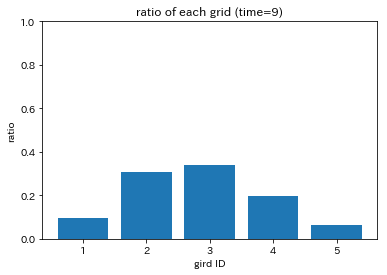

In [31]:
plt.bar(label_lst, count_lst)
plt.ylim(0, 1)
plt.title("ratio of each grid (time={})".format(9))
plt.ylabel("ratio")
plt.xlabel("gird ID")
plt.savefig("./grid_img/grid_9.png")

In [16]:
def grid_fig(time, grid_num=5):
    cord_dictlst = total_cord("../data/20170421/{}/".format(time))
    cord_df = pd.DataFrame(cord_dictlst)
    
    WIDTH = 1280
    grid_width = int(WIDTH/grid_num)
    
    cord_df["grid_x"] = (cord_df["x"]/grid_width).astype(np.int32)
    
    count_dict = {}
    for grid_index in range(grid_num):
        count = len(cord_df[cord_df["grid_x"] == grid_index])
        count_dict[grid_index] = count/len(cord_df)
        
    label_lst = []
    count_lst = []

    for key, value in count_dict.items():
        label_lst.append(key+1)
        count_lst.append(value)
        
    plt.bar(label_lst, count_lst, color="b")
    plt.ylim(0, 1)
    plt.title("ratio of each grid (time={})".format(time))
    plt.ylabel("ratio")
    plt.xlabel("gird ID")
    plt.xticks(label_lst)
    plt.savefig("./grid_img/grid_{}.png".format(time))

100%|██████████| 3597/3597 [00:01<00:00, 2164.87it/s]


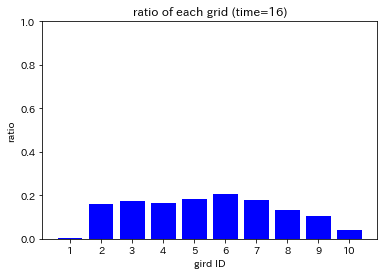

In [17]:
for i in range(9, 17):
    grid_fig(i, grid_num=10)

100%|██████████| 3597/3597 [00:01<00:00, 2314.22it/s]


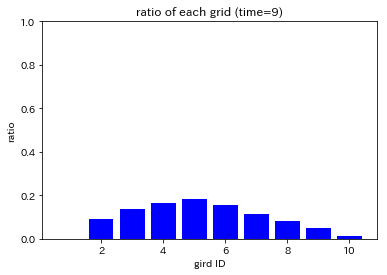

In [9]:
grid_fig(9, grid_num=10)